# Getting Data sets

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split

import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = 'https://raw.githubusercontent.com/WoradeeKongthong/medical_cost_regression/master/insurance.csv'
df = pd.read_csv(url)

In [0]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


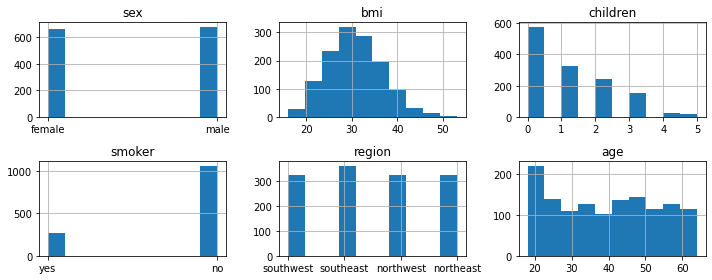

In [0]:
rows = 2
cols = 3
col = df.columns
index = 0

fig = plt.figure(figsize=(10,4))

for i in range(len(col)-1):
    fig.add_subplot(str(rows)+str(cols)+str(i))
    df[col[index]].hist()
    plt.title(col[index])
    index += 1

plt.tight_layout()

# X and y

In [0]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Make Column Transformer, model object and pipeline

In [0]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [0]:
X_col_trans = make_column_transformer(
    (OneHotEncoder(drop='first'), ['sex','smoker','region']),
    (StandardScaler(), ['age','bmi']),
    remainder='passthrough'
)

In [0]:
model = SVR(kernel = 'rbf', gamma='auto',C=10)

In [0]:
pipe = make_pipeline(X_col_trans, model)

# Cross Validation Score

In [0]:
# SVR needs scaling on y
y = y.values
y = y.reshape(len(y),1)
y_scaler = StandardScaler()
y = y_scaler.fit_transform(y)
y = y.reshape(len(y),)
y = pd.Series(y)

In [0]:
accuracy = cross_val_score(pipe, X, y, cv=10)
print('mean accuracy = {}'.format(accuracy.mean()))
print('std accuracy = {}'.format(accuracy.std()))

mean accuracy = 0.8401629291064647
std accuracy = 0.0441464124429958


# Training set vs Test Set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.795795029778109

Note: To work on new data set
1. y_predicted = pipe.predict(new_X)
2. y_predicted = y_scaler.inverse_transform(y_predicted)

# Pickling the model

In [0]:
pickl = {
    'y_scaler' : y_scaler,
    'model' : pipe
}
pickle.dump( pickl, open( 'SVRmodel' + ".p", "wb" ) )

# Test the pickled model

In [0]:
x = [19,'female',27.9,0,'yes','southwest']
col = ['age','sex','bmi','children','smoker','region']

new_df = pd.DataFrame(data=[x],columns=col)

In [0]:
new_df

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest


In [0]:
data = pickle.load(open('SVRmodel.p','rb'))

In [0]:
svr = data['model']
y_sc = data['y_scaler']

In [0]:
prediction = svr.predict(new_df)
prediction

array([0.80195672])

In [0]:
dollar = y_sc.inverse_transform(prediction)

In [0]:
dollar[0]

22978.4972351931